# Linear Regression

## Table of contents
1. What is Linear Regression?
2. Hypothesis of Linear Regression
3. Training a Linear Regression model
4. Evaluating the model
5. scikit-learn implementation

## What is Linear Regression?
The objective of Linear Regression model is to find a relationship between one or more features(independent variables) and a continuous target variable(or dependent variable). When there is only feature, it is called *Univariate Linear Regression* and if there are multiple features, it is called *Multivariate Linear Regression*

## Hypothesis of Linear Regression
The linear regression model can be represented by the following equation:      

$$ Y = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \dots + \theta_n x_n $$

- Y is the predicted value
- $ \theta_0 $ is the bias term.
- $ \theta_1,...,\theta_n $ are the model parameters
- $ x_1,...,x_n $ are the feature values

The above hypothesis can also be represented by  
$$ Y = \theta^T X $$

where
- $ \theta $ is the model's parameter vector including the bias term $ \theta_0 $
- X is the feature vector with $ x_0 = 1 $

#### Dataset
Let's create some random data-set to train our model.

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt

# generate random data-set
np.random.seed(0)
x = np.random.rand(100, 1)
y = 2 + 3 * x + np.random.rand(100, 1)

# plot
plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

<Figure size 640x480 with 1 Axes>

## Training a Linear Regression model
Training of the model here means to find the parameters so that the model best fits the data.

**How do we determine the best fit line?**  
The line for which the error between the predicted values and the observed values is minimum is called the best fit line or the **regression** line. These errors are also called as **residuals**. The residuals can be visualized by the vertical lines from the observed data value to the regression line.

![Residual errors](https://miro.medium.com/max/394/1*6lzTBeDt_J39XPvhI4NAMg.png)
Image credits: __[Animesh Agarwal blog](https://towardsdatascience.com/linear-regression-using-python-b136c91bf0a2)__

To define and measure the error of our model we define the cost function as the sum of the squares of the residuals. The cost function is denoted by  
$$ J(\theta) = \frac1{2m}\ \sum_{i=1}^m (h(x^i) - y^i)^2 $$

where the hypothesis function h(x) is denoted by

$$ h(x) = \theta_0 + \theta_1 x_1 + \dots + \theta_n x_n $$

and m is the total number of training examples in our dataset.

<div class="alert alert-block alert-success">
<b>Why do we take the square of the residuals and not the absolute value of the residuals?</b><br/>
We want to penalize the points which are farther from the regression line much more than the points which lie close to the line.
</div>

Our objective is to find the model parameters so that the cost function is minimum. We will use Gradient Descent to find this. 

### Gradient descent 
Gradient descent is a generic optimization algorithm and it iteratively tweaks the parameters of model in order to minimize the cost function. The steps of gradient descent is outlined below:

1. We first initialize the model parameters with some random values. This is called as **random initialization**
2. Now we need to measure how cost function changes with change in it's parameters. Therefore, we compute the partial derivative of the cost function w.r.t. the parameters $ \theta_0, \theta_1, ..., \theta_n $
    $$ \frac{\partial J(\theta)}{\partial \theta_0} = \frac1{m} \sum_{i=1}^m (h(x^i) - y^i) $$
    $$ \frac{\partial J(\theta)}{\partial \theta_1} = \frac1{m} \sum_{i=1}^m (h(x^i) - y^i) x_1^i $$
    
    similarly, the partial derivative of the cost function w.r.t. any parameter can be denoted by
    $$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac1{m} \sum_{i=1}^m (h(x^i) - y^i) x_j^i $$
    
    We can compute the partial derivatives for all parameters at once using
    <center> 
    \begin{equation*}
        \begin{bmatrix}
            \frac{\partial J(\theta)}{\partial \theta_0} \\
            \frac{\partial J(\theta)}{\partial \theta_1} \\
            \vdots \\
            \frac{\partial J(\theta)}{\partial \theta_n} \\
        \end{bmatrix}
    = \frac1{m} x^T (h(x) - y)
    \end{equation*} </center>
    
    where h(x) is 
    $$ h(x) = \theta_0 + \theta_1 x_1 + \dots + \theta_n x_n $$
    
3. After computing the derivative we update the parameters as given below
    $$ \theta_0 = \theta_0 - \frac{\alpha}{m} \sum_{i=1}^m (h(x^i) - y^i) $$
    $$ \theta_1 = \theta_1 - \frac{\alpha}{m} \sum_{i=1}^m (h(x^i) - y^i) x_1^i $$
    
    where \alpha is the learning parameter.
    
    We can update all the parameters at once using
    \begin{equation*}
        \begin{bmatrix}
            \theta_0 \\
            \theta_1 \\
            \vdots \\
            \theta_n
        \end{bmatrix}
        = \begin{bmatrix}
            \theta_0 \\
            \theta_1 \\
            \vdots \\
            \theta_n
        \end{bmatrix}
        - \alpha \begin{bmatrix}
            \frac{\partial J(\theta)}{\partial \theta_0} \\
            \frac{\partial J(\theta)}{\partial \theta_1} \\
            \vdots \\
            \frac{\partial J(\theta)}{\partial \theta_n} \\
        \end{bmatrix}
    \end{equation*}
    
    We repeat the steps 2,3 until the cost function converges to the minimum value. If the value of $ \alpha $ is too small, the cost function takes longer time to converge. If $ \alpha $ is too large, gradient descent may overshoot the minimum and may finally fail to converge. 

To demonstrate the gradient descent algorithm, we initialize the model parameters with 0. The equation becomes Y = 0. Gradient descent algorithm now tries to update the value of the parameters so that we arrive at the best fit line. 

### Implementing Linear Regression from scratch

In [2]:
# imports
import numpy as np

class LinearRegressionUsingGD:
    """Linear Regression Using Gradient Descent.
    
    Parameters
    ----------
    eta : float
        Learning rate
    n_iterations : int
        No of passes over the training set
    
    Attributes
    ----------
    w_ : weights/ after fitting the model
    cost_ : total error of the model after each iteration
    
    """
    
    def __init__(self, eta=0.05, n_iterations=1000):
        self.eta = eta
        self.n_iterations = n_iterations
        
    def fit(self, x, y):
        """Fit the training data
        
        Parameters
        ----------
        x : array-like, shape = [m_samples, n_features]
            Training samples
        y : array-like, shape = [m_samples, n_target_values]
            Target values
        
        Returns
        -------
        self : object
        
        """
        
        # Add 1s column for weight-0
        X = self.__add1sColumnToFeatureArray(x)
        
        self.cost_ = []
        self.w_ = np.zeros((X.shape[1], 1))
        m = X.shape[0]
        
        for _ in range(self.n_iterations):
            y_pred = np.dot(X, self.w_)
            residuals = y_pred - y
            gradient_vector = np.dot(X.T, residuals)
            self.w_ -= (self.eta / m)*gradient_vector
            cost = np.sum((residuals**2))/(2*m)
            self.cost_.append(cost)
            
        return self
    
    def predict(self, x):
        """ Predicts the value after the model has been trained.
        
        Parameters
        ----------
        x : array-like, shape = [n_samples, n_features]
            Test samples
        
        Returns
        -------
        Predicted value
        
        """
        X = self.__add1sColumnToFeatureArray(x)
        
        return np.dot(X, self.w_)
    
    def __add1sColumnToFeatureArray(self, x): # Private method
        # Add 1s column for weight-0
        return np.column_stack((np.ones((x.shape[0],1)), x))

In [3]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=0)

model = LinearRegressionUsingGD() # eta=0.05, n_iterations = 1000
model.fit(x_train, y_train)


In [4]:
model.w_

array([[2.60746637],
       [2.85197613]])

In [5]:
y_predict = model.predict(x_test)

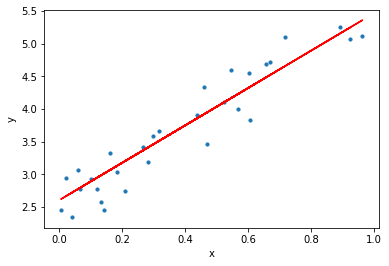

In [7]:
plt.scatter(x_test, y_test, s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x_test, y_predict, color='r')
plt.show()

Till now we've implemented Linear Regression from scratch and used gradient descent to find the model parameters. But how good is our model?

## Evaluating the model
We will be using **Root Mean Squared Error (RMSE)** and Coefficient Determination($ R^2 $ score) to evaluate our model. 

### RMSE
RMSE is the square root of average of the sum of the squares of residuals. 

RMSE is defined by
$$ RMSE = \sqrt{\frac1{m} \sum_{i=1}^m (h(x^i) - y^i)^2} $$

In [13]:
# Mean Squared Error
mse = np.mean((y_test - y_predict)**2)
print('Mean Squared Error = ', mse)

rmse = np.sqrt(mse)
print('Root mean squared error = ', rmse)

Mean Squared Error =  0.08492949957212169
Root mean squared error =  0.29142666242490867


$ R^2 $ score or the coefficient of determination explains how much the total variance of the dependent variable can be reduced by using the least square regression. 

$ R^2 $ is determined by 
$$ R^2 = 1 - \frac{SS_r}{SS_t} $$

where, $ SS_t $ is the total sum of errors if we take the mean of the observed values as the predicted value. 
$$ SS_t = \sum_{i=1}^m (y^i - \bar{y})^2  $$

$ SS_r $ is the sum of the square of residuals
$$ SS_r = \sum_{i=1}^m (h(x^i) - y^i)^2  $$

In [15]:
# sum of squares of residuals
ssr = np.sum((y_predict - y_test)**2)
print ('Sum of squares of residuals = ', ssr)

# total sum of squares
sst = np.sum((y_test - np.mean(y_test))**2)
print ('Total sum of squares = ', sst)

# r2 score
r2_score = 1 - (ssr/sst)
print ('R2 score = ', r2_score)

Sum of squares of residuals =  2.5478849871636506
Total sum of squares =  23.846335706615392
R2 score =  0.8931540250665505


> If we use the mean of the observed values as the predicted value the variance is 23.846 and if we use regression the total variance is 2.548. We reduced the prediction error by ~89% by using regression. 

Now, let's try to implement linear regression using the popular scikit-learn library. 

### Scikit-learn implementation

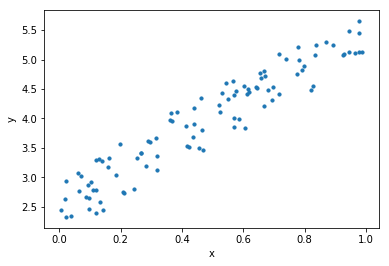

Model intercept =  [2.57960923]
Model coefficients =  [[2.90298892]]
Mean Squared error =  0.08356265506631197
Root Mean Squared error =  0.2890720586053103
R2 score =  0.8948735905242705


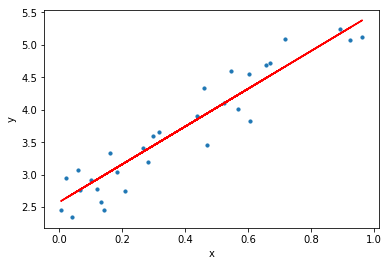

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# generate random data-set
np.random.seed(0)
x = np.random.rand(100, 1)
y = 2 + 3 * x + np.random.rand(100, 1)

# plot
plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# train and test split of dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

model = LinearRegression()
model.fit(x_train, y_train)
print('Model intercept = ', model.intercept_)
print('Model coefficients = ', model.coef_)

y_predict = model.predict(x_test)

mse = mean_squared_error(y_true=y_test, y_pred=y_predict)
print('Mean Squared error = ', mse)

rmse = np.sqrt(mse)
print('Root Mean Squared error = ', rmse)

r2score = r2_score(y_test, y_predict)
print('R2 score = ', r2score)

plt.scatter(x_test, y_test, s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x_test, y_predict, color='r')
plt.show()

This is similar to what we achieved when we implemented Linear Regression from scratch. 